# 3장

## 3.2 활성화 함수

### 3.2.2 계단 함수 구현하기

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

이 구현은 단순하고 쉽지만, x는 실수만 받아들여짐.\
넘파이 배열을 인수로 넣을 수 없음

In [2]:
# 위의 문제를 수정함
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [3]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x


array([-1.,  1.,  2.])

In [4]:
y = x > 0
y

array([False,  True,  True])

In [5]:
y = y.astype(np.int32)
y

array([0, 1, 1], dtype=int32)

### 3.2.3 계단 함수의 그래프

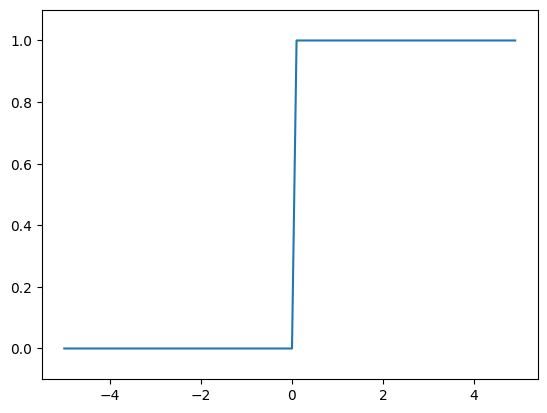

In [6]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype=np.int32)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [7]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [8]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [9]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [10]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

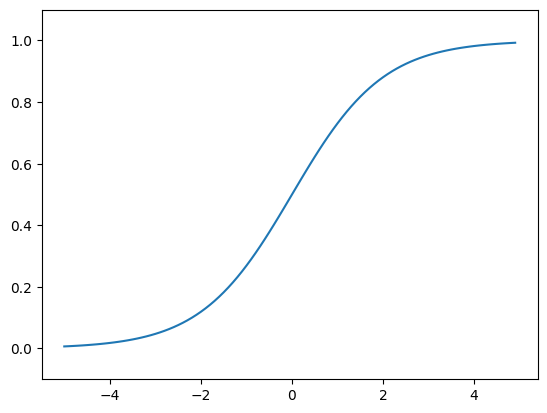

In [11]:
# 시그모이드 함수 그래프 그려보기
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.7 ReLU 함수

ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수.

In [12]:
def relu(x):
    return np.maximum(0, x)

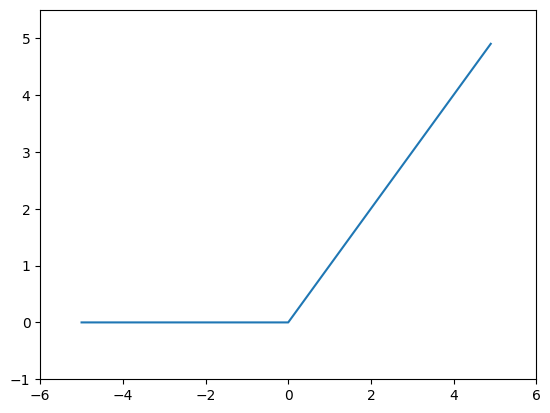

In [13]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.xlim(-6, 6)
plt.show()

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

- np.ndim()으로 배열의 차원 수를 알 수 있다.
- .shape()으로 배열의 형상을 알 수 있다. (튜플로 반환.)

1차원 배열

In [14]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [15]:
np.ndim(A)

1

In [16]:
A.shape # 튜플로 출력

(4,)

In [17]:
A.shape[0]

4

2차원 배열

In [18]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [19]:
np.ndim(B)

2

In [20]:
B.shape

(3, 2)

### 3.3.2 행렬의 곱

2차원 행렬의 곱

In [21]:
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [22]:
B = np.array([[5,6], [7,8]])
B.shape

(2, 2)

In [23]:
np.dot(A, B) # 앞뒤 순서에 따라 결과가 다를 수 있음.

array([[19, 22],
       [43, 50]])

In [24]:
A = np.array([[1,2,3], [4, 5, 6]])
A.shape

(2, 3)

In [25]:
B = np.array([[1,2], [3,4], [5,6]])
B.shape

(3, 2)

In [26]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [27]:
np.dot(B, A)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

In [28]:
C = np.array([[1,2], [3,4]])
C.shape

(2, 2)

In [29]:
A.shape

(2, 3)

In [30]:
np.dot(A, C) # 오류

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [31]:
A = np.array([[1,2], [3,4], [5,6]])
A.shape

(3, 2)

In [32]:
B = np.array([7,8])
B.shape

(2,)

In [33]:
np.dot(A, B)

array([23, 53, 83])

### 3.3.3 신경망에서의 행렬 곱

In [34]:
X = np.array([1,2]) # x값
X.shape

(2,)

In [35]:
W = np.array([[1,3,5], [2,4,6]]) # 가중치
print(W)

[[1 3 5]
 [2 4 6]]


In [36]:
W.shape

(2, 3)

In [37]:
Y = np.dot(X, W) # y값
print(Y)

[ 5 11 17]


## 3.4 3층 신경망 구현하기

3층 신경망 : 입력층(0층)은 2개, 첫 번째 은닉층(1층)은 3개, 두 번째 은닉층(2층)은 2개, 출력층(3층)은 2개의 뉴런으로 구성된다.

### 3.4.2 각 층의 신호 전달 구현하기

0층 -> 1층

In [38]:
X = np.array([1.0, 0.5]) # X값
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 가중치
B1 = np.array([0.1, 0.2, 0.3]) # 편향

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [39]:
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [40]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


1층 -> 2층

In [41]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [42]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

2층 -> 출력층

In [43]:
def identity_function(x): # 항등함수
    return x

In [44]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # or Y = A3
Y

array([0.31682708, 0.69627909])

### 3.4.3 구현 정리

In [45]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

In [46]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

In [47]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

일반적으로 회귀에는 항등 함수, 분류에는 소프트맥스 함수 사용

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

항등 함수는 입력 그대로 출력함.

In [48]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [49]:
sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

74.1221542101633


In [50]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [51]:
# 소프트맥스 함수
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

e의 1000제곱은 무한대를 뜻하는 inf가 출력되기 때문에 결과 수치가 '불안정'해진다.\
오버플로 : 컴퓨터가 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현할 수 없는 문제가 발생한다.

In [52]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

C:\Users\swc08\AppData\Local\Temp\ipykernel_24868\832863605.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
C:\Users\swc08\AppData\Local\Temp\ipykernel_24868\832863605.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [53]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [54]:
np.exp(a-c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [55]:
# 위의 문제를 개선한 소프트맥스 함수
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.3 소프트맥스 함수의 특징

In [56]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [57]:
np.sum(y) # 소프트맥스 함수의 출력 총합이 1이 된다.

np.float64(1.0)

## 3.6 손글씨 숫자 인식

### 3.6.1 MNIST 데이터셋

- 0부터 9까지의 숫자 이미지로 구성
- 훈련 이미지 60,000장, 시험 이미지 10,000장
- 28 x 28 크기의 회색조 이미지(1채널)
- 각 픽셀은 0에서 255까지의 값을 취함

In [58]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from datasets.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


load_mnist 함수
- (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블) 형식으로 반환
- normalize(첫 번째 인자) : 입력 이미지의 픽셀값을 0.0 ~ 1.0 사이의 값으로 정규화할지를 정함. False로 설정하면 원래 값 그대로 0~255 유지
- flatten(두 번째 인자) : 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 정함. False로 설정하면 입력 이미지를 1x28x28의 3차원, True로 설정하면 784개의 원소로 이뤄진 1차원 배열로 저장.
- one_hot_label(세 번쨰 인자) : 레이블을 원-핫 인코딩 형태로 저장할지를 정함. False면 숫자 형태로 저장, True면 원-핫 인코딩하여 저장.


In [59]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from datasets.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

5


In [60]:
print(img.shape)
img = img.reshape(28,28) # flatten = True 설정했으므로 원래 이미지의 모양으로 변형.
print(img.shape)

img_show(img)

(784,)
(28, 28)


### 3.6.2 신경망의 추론 처리

In [61]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

?????????????????????????????

## 3.7 정리

### 이번 장에서 배운 내용
- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
- 출력층의 활성화 삼수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
- 분류에서는 출력층의 뉴런 수 를 분류하려는 클래스 수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.